In [38]:
from PIL import Image

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
image1 = Image.open('/content/drive/MyDrive/Colab Notebooks/Steganography/images/nature.png')
image2=Image.open('/content/drive/MyDrive/Colab Notebooks/Steganography/images/nature1.png')

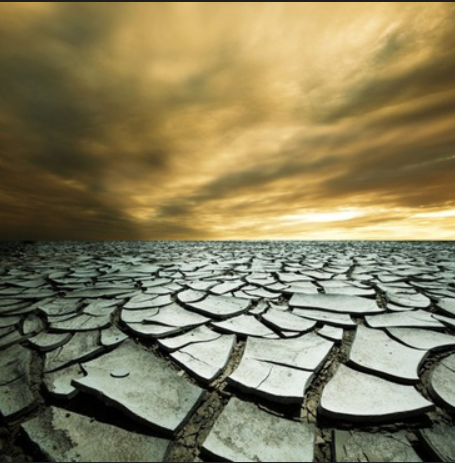

In [41]:
image1

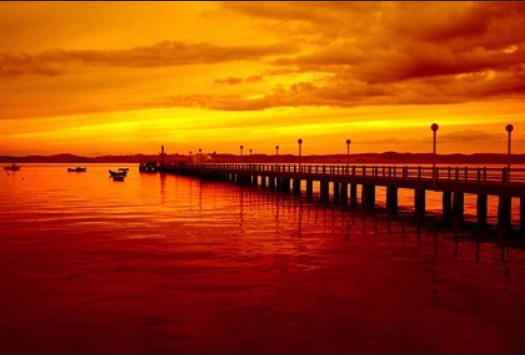

In [42]:
image2

In [43]:
image1.size

(455, 463)

# Resizing Image 1

In [44]:
image1= image1.resize((300,200))

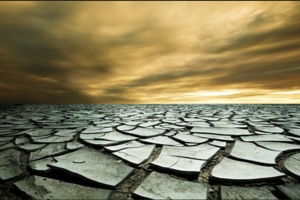

In [45]:
image1

In [46]:
image1.size

(300, 200)

In [47]:
image2.size

(525, 355)

# We will be merging image 1  on image 2


# Integer to binary Coversion->


In [48]:
def int2bin(rgb):

    #Will convert RGB pixel values from integer to binary
    #INPUT: An integer tuple (e.g. (220, 110, 96))
    #OUTPUT: A string tuple (e.g. ("00101010", "11101011", "00010110"))

    r, g, b = rgb
    return ('{0:08b}'.format(r),
            '{0:08b}'.format(g),
            '{0:08b}'.format(b))
    #Return converted r,g,b binary values separately..

# Binary to Integer Conversion-->



In [49]:
def bin2int(rgb):

    #Will convert RGB pixel values from binary to integer.
    #Reverse of the first part.

    r, g, b = rgb
    return (int(r, 2),
            int(g, 2),
            int(b, 2))
    #return converted r,g,b integer values separately

In [50]:
r,g,b=int2bin((225,6,7))
r

'11100001'

In [51]:
r[:4]

'1110'

# [:4] will be taking the first 4 digits.

# And [:-4] will be taking the digits ignoring the last 4 digits..


In [52]:
print(g)
print(b)

00000110
00000111


In [53]:
bin2int(('11100001', '00000110', '00000111'))

(225, 6, 7)

# Our convertion functions are working perfectly.

In [54]:
def merge2rgb(rgb1,rgb2):

    #Will merge two RGB pixels using 4 least significant bits.
    #INPUT: A string tuple ( ("00101010", "11101011", "00010110")),another string tuple (e.g. ("00101010", "11101011", "00010110"))
    #OUTPUT: An integer tuple with the two RGB values merged
    #Will be merging the first four digits of first image and first four digits of 2nd image(i.e to be merged) as last four digits..


    r1,g1,b1=rgb1
    r2,g2,b2=rgb2

    return (r1[:4]+r2[:4],
             g1[:4]+g2[:4],
             b1[:4]+b2[:4]
          )

# Function to merge two Images-->


In [55]:
def merge2img(img1,img2):
  # The First image will be merged into the second image.


  image1=img1
  image2=img2
  #print('toran')

  # Condition for merging
  if(image1.size[0]>image2.size[0] or image1.size[1]>image2.size[1]):
    print("Cannot merge as the size of 1st Image is greater than size of 2nd Image")
    return
  # Getting the pixel map of the two images

  pixel_tuple1 = image1.load()
  pixel_tuple2 = image2.load()

  #print(pixel_tuple1)
  #print(pixel_tuple2)

  # The new image that will be created.
  new_image = Image.new(image2.mode, image2.size) # Setting the size of Image 2 as Image 1 will be merged to Image 2.
  pixels_new = new_image.load()

  for row in range(image2.size[0]):
    for col in range(image2.size[1]):

        rgb1 = int2bin(pixel_tuple2[row, col])

        # Using a black pixel as default
        rgb2 = int2bin((0, 0, 0))

        # Converting the pixels of image 1 if condition is satisfied

        if(row <image1.size[0] and col< image1.size[1]):
          rgb2= int2bin(pixel_tuple1[row,col])


        merge_rgb= merge2rgb(rgb1,rgb2)

        pixels_new[row,col] = bin2int(merge_rgb)

  #print('toran')
  new_image.convert('RGB').save('/content/drive/MyDrive/Colab Notebooks/Steganography/images/merged1.jpg')

  return new_image



In [56]:
!pip install Pillow

from PIL import Image

def int2bin(rgb):
    """
    Convert an integer tuple representing an RGB color to its binary representation.

    INPUT: An integer tuple (e.g. (64, 255, 10))
    OUTPUT: A string tuple (e.g. ("00101010", "11101011", "00010110"))
    """
    # Check if rgb has 3 elements (R, G, B)
    if len(rgb) == 3:
        r, g, b = rgb
    # If rgb has 4 elements (R, G, B, A), ignore A
    elif len(rgb) == 4:
        r, g, b, _ = rgb  # Ignore the alpha channel
    else:
        raise ValueError(f"Invalid rgb tuple: {rgb}. Expected 3 or 4 elements.")

    return ('{0:08b}'.format(r),
            '{0:08b}'.format(g),
            '{0:08b}'.format(b))


def merge2rgb(rgb1, rgb2):
    """
    Merge two RGB pixels using 4 least significant bits.

    INPUT: A string tuple (e.g. ("00101010", "11101011", "00010110")),
           another string tuple (e.g. ("00101010", "11101011", "00010110"))
    OUTPUT: An integer tuple with the two RGB values merged
    """
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2

    return (r1[:4] + r2[:4],
            g1[:4] + g2[:4],
            b1[:4] + b2[:4])


def merge2img(img1, img2):
    """
    Merge two images. The First image will be merged into the second image.
    """
    image1 = img1
    image2 = img2

    # Condition for merging
    if image1.size[0] > image2.size[0] or image1.size[1] > image2.size[1]:
        print("Cannot merge as the size of 1st Image is greater than size of 2nd Image")
        return

    # Getting the pixel map of the two images
    pixel_tuple1 = image1.load()
    pixel_tuple2 = image2.load()

    # The new image that will be created.
    new_image = Image.new(image2.mode, image2.size)
    pixels_new = new_image.load()

    for row in range(image2.size[0]):
        for col in range(image2.size[1]):
            rgb1 = int2bin(pixel_tuple2[row, col])

            # Using a black pixel as default
            rgb2 = int2bin((0, 0, 0))

            # Converting the pixels of image 1 if condition is satisfied
            if row < image1.size[0] and col < image1.size[1]:
                rgb2 = int2bin(pixel_tuple1[row, col])

            merge_rgb = merge2rgb(rgb1, rgb2)

            pixels_new[row, col] = bin2int(merge_rgb)

    # Save the merged image
    new_image.convert

In [57]:
merge2img(image1,image2)

# See now our image 1 is merged inside image 2.But still image 2 is looking as it was earlier..


In [58]:
def unmerge(path):

    img=Image.open(path)

    # Loading the pixel map
    pixel_map = img.load()

    new_image = Image.new(img.mode, img.size)
    pixels_new = new_image.load()

    # Tuple used to store the image original size
    original_size = img.size

    for row in range(img.size[0]):
        for col in range(img.size[1]):
            # Get the RGB (as a string tuple) from the current pixel
            r, g, b = int2bin(pixel_map[row, col])

            # Extract the last 4 bits (corresponding to the hidden image)
            # Concatenate 4 zero bits because we are working with 8 bit values
            rgb = (r[4:] + "0000",
                   g[4:] + "0000",
                   b[4:] + "0000")

            # Convert it to an integer tuple
            pixels_new[row, col] = bin2int(rgb)

            # If this is a 'valid' position, store it
            # as the last valid position
            if pixels_new[row, col] != (0, 0, 0):
                original_size = (row + 1, col + 1)

    # Crop the image based on the 'valid' pixels
    new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

    new_image.save('/content/drive/MyDrive/Colab Notebooks/Steganography/images/unmerged1.png')

    return new_image

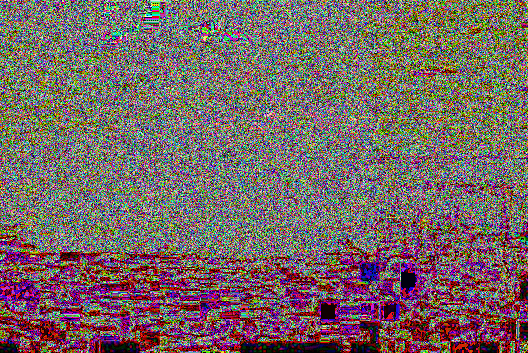

In [59]:
unmerge('/content/drive/MyDrive/Colab Notebooks/Steganography/images/merged1.jpg')

# Here we are seeing that the unmerged image is not clear at all
# now we should change our merging pattern.
# We can now take 2 MSBs from image 1 and add 6 MSBs of image2 while merging..

In [60]:
def merge2rgb2(rgb1, rgb2):

    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    rgb = (r1[:6] + r2[:2],
           g1[:6] + g2[:2],
           b1[:6] + b2[:2])
    return rgb

In [61]:
def merge2img2(img1, img2):

    image1=img1
    image2=img2
    #print('toran')

    # Condition for merging
    if(image1.size[0]>image2.size[0] or image1.size[1]>image2.size[1]):
       print("Cannot merge as the size of 1st Image is greater than size of 2nd Image")
       return

  # Getting the pixel map of the two images
    pixel_tuple1 = image1.load()
    pixel_tuple2 = image2.load()

    #print(pixel_tuple1)
    #print(pixel_tuple2)

    # The new image that will be created.
    new_image = Image.new(image2.mode, image2.size) # Setting the size of Image 2 as Image 1 will be merged to Image 2.
    pixels_new = new_image.load()

    for row in range(image2.size[0]):
      for col in range(image2.size[1]):

        rgb1 = int2bin(pixel_tuple2[row, col])

        # Using a black pixel as default
        rgb2 = int2bin((0, 0, 0))

        # Converting the pixels of image 1 if condition is satisfied

        if(row <image1.size[0] and col< image1.size[1]):
          rgb2= int2bin(pixel_tuple1[row,col])


        merge_rgb= merge2rgb2(rgb1,rgb2)

        pixels_new[row,col] = bin2int(merge_rgb)

    #print('toran')
    new_image.convert('RGB').save('/content/drive/MyDrive/Colab Notebooks/Steganography/images/merged2.jpg')

    return new_image

In [62]:
def unmerge2(img):

    pixel_map = img.load()

    new_image = Image.new(img.mode, img.size)
    pixels_new = new_image.load()


    original_size = img.size

    for row in range(img.size[0]):
        for col in range(img.size[1]):
            r, g, b = int2bin(pixel_map[row, col])

            # Extracting the last 6 bits (corresponding to the hidden image) and adding zeroes to increase the brightness.

            rgb = (r[6:] + "000000",
                   g[6:] + "000000",
                   b[6:] + "000000")

            # Convert it to an integer tuple
            pixels_new[row, col] = bin2int(rgb)

           #If this is a 'valid' position, store it as a last valid option
            if pixels_new[row, col] != (0, 0, 0):
                original_size = (row + 1, col + 1)

    # Crop the image based on the 'valid' pixels
    new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

    return new_image

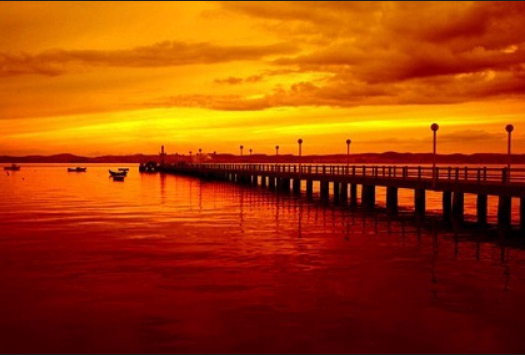

In [63]:
merged_image2 = merge2img2(image1,image2)
merged_image2

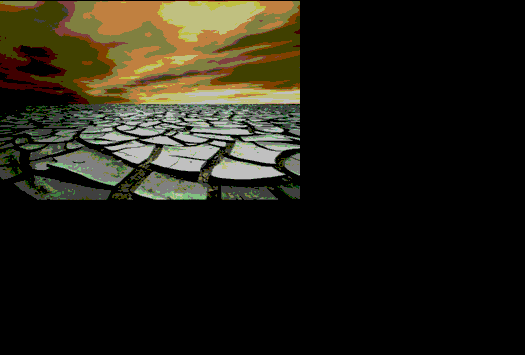

In [64]:
unmerged_image2 = unmerge2(merged_image2)
unmerged_image2

# So we have concluded that the 2 MSBs of Image 1 were more important than 4 MSBs of image 1, they were adding noise to the image. So merging 6 MSBs of Image2 and 2 MSBs of Image 1 was fruitful.